# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [1]:
import numpy as np
import pandas as pd

def read_subject_info():
    '''
    This function read_subject_info() which reads in the information in subject_info.txt, and returns two outputs:
    list headers containing the four column headers as strings, read from the first line in the file;
    NumPy array info containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).
'''
    # Read the specified file
    subject_info = pd.read_csv('dataset/subject_info.txt')

    # Extract information and convert the data to np type
    info = np.array(subject_info,dtype='float')
    
    # Convert height into meters
    info[:,2] = (info[:,2])/100

    # Extract headers and convert the data to np type
    headers = subject_info.columns
    return headers,info

print(read_subject_info())

    

(Index(['Subject', 'Weight', 'Height', 'Age'], dtype='object'), array([[  1.  ,  95.  ,   1.83,  27.  ],
       [  2.  ,  80.  ,   1.96,  25.  ],
       [  3.  ,  62.  ,   1.78,  27.  ],
       [  4.  ,  65.  ,   1.83,  25.  ],
       [  5.  ,  74.  ,   1.84,  40.  ],
       [  6.  ,  70.  ,   1.75,  20.  ],
       [  7.  , 115.  ,   1.86,  27.  ],
       [  8.  ,  80.  ,   1.8 ,  24.  ],
       [  9.  ,  70.  ,   1.75,  29.  ],
       [ 10.  ,  92.  ,   2.05,  32.  ]]))


---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

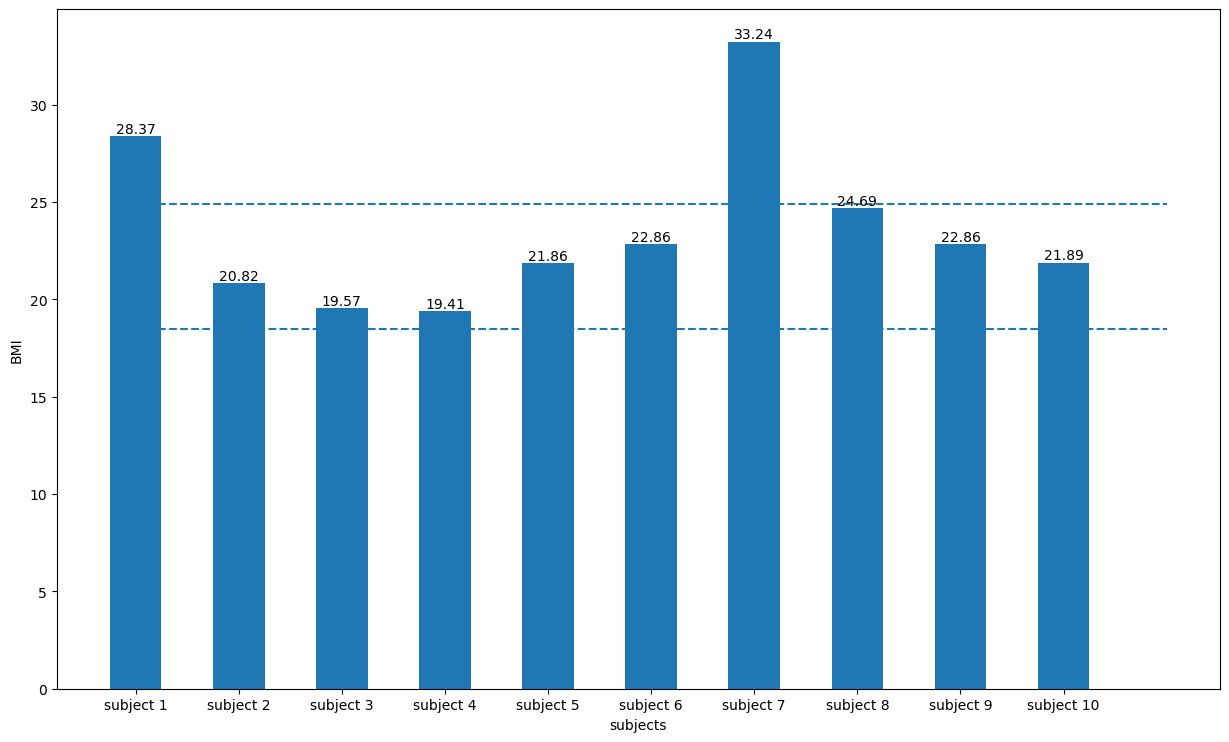

In [2]:
# Extract the required data
headers,info = read_subject_info()
import numpy as np
import matplotlib. pyplot as plt

def bmi_chart(info):
    '''This function is used to calculate bmi and draw a chart to determine whether it exceeds the standard
    '''
    # Calculate bmi using a lambda expression
    bmi=lambda x:x[1]/(x[2]**2)
    bmi_arr=[]

    # Add the calculation result to the array
    for i in info:
        bmi_arr.append(bmi(i))
    
    # Build canvas size and resolution
    fig = plt.figure(figsize=(15,9),dpi=100)

    # Add coordinates for the x axis with the contents of object + number
    x_ticks = ['subject 1', 'subject 2', 'subject 3', 'subject 4', 'subject 5', 'subject 6','subject 7','subject 8','subject 9','subject 10']
    
    # Set the location of the label
    x1 = np.arange(len(x_ticks))
    y1 = bmi_arr
    plt.xticks(x1, x_ticks)
    plt.yticks

    # Draw a bar chart and set the width of the column
    barWidth = 0.5
    plt.bar(x1, y1, width=barWidth)
    
    # Add data text to each column, reserving 2 decimal places
    for a, b in zip(x1, y1):
        plt.text(a, b, '%.2f'%b, ha='center', va= 'bottom')

    # Set two parallel lines as the upper and lower limits to determine whether the requirements are met
    plt.hlines(18.5, 0, len(x_ticks), linestyles = "dashed")
    plt.hlines(24.9, 0, len(x_ticks), linestyles = "dashed")

    # Label the horizontal and vertical coordinates
    plt.xlabel(u'subjects')
    plt.ylabel(u'BMI')
    
    plt.show()


bmi_chart(info)
    

---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
1814400.0
<class 'numpy.timedelta64'>
21.0


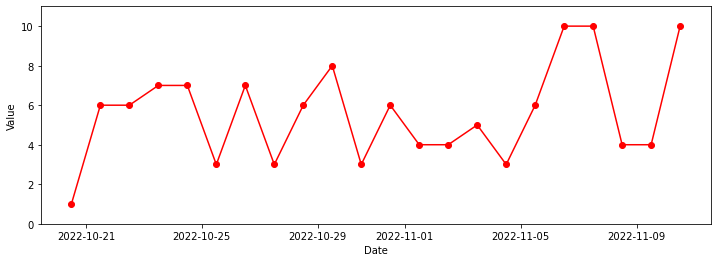

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print(seconds_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).

**[3 marks]**

In [4]:
import numpy as np
import pandas as pd

def read_heartbeat_data(subject):
    '''Read the file and return it as two NumPy vectors:
    times, containing the recorded times of each heartbeat (as datetime64[s] objects),
    intervals, containing the recorded intervals between heartbeats (in seconds, as float numbers).
    '''
    
    # Design a path to read the data information of different objects
    path='dataset/subject_'+str(subject)+'/heartbeats.txt'
    subject_heartbeat = pd.read_csv(path)

    # extract times as datetime64[s] objects and arranged in np type.
    times = np.array(subject_heartbeat['Time'], dtype='datetime64')

    # extract intervals as float objects and arranged in np type.
    intervals = np.array(subject_heartbeat['Interval between heartbeats (s)'], dtype='float')

    return times,intervals
    

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [5]:
import numpy as np
# Extract relevant data
times,intervals=read_heartbeat_data(1)

def hr_from_intervals(intervals):
    '''This formula is used to calculate the number of heartbeats per minute and is returned as floating-point numbers
    '''
    beats_per_min = []

    # Take the interval and divide it by 60 seconds to get the number of heartbeats per minute
    for i in intervals:
        beats_per_min.append(60/i)
        
    return np.array(beats_per_min, dtype='float')
    

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [6]:
def clean_data(times_raw, hr_raw, prc_low, prc_high):
    '''This formula is used for data cleaning to eliminate data that is higher than the specified percentage and lower than the specified percentage
    '''
    times = []
    hr = []

    # Use the percentile in NumPy functionality to find the threshold for maximum and minimum heart rate
    hr_low = np.percentile(hr_raw, prc_low)
    hr_high = np.percentile(hr_raw, prc_high)

    # Find the data within the threshold value and add it to the array
    for i in range(len(hr_raw)):
        if hr_raw[i] >= hr_low and hr_raw[i] <= hr_high:
            times.append(times_raw[i])
            hr.append(hr_raw[i])

    times = np.array(times)
    hr = np.array(hr)

    return times, hr

---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

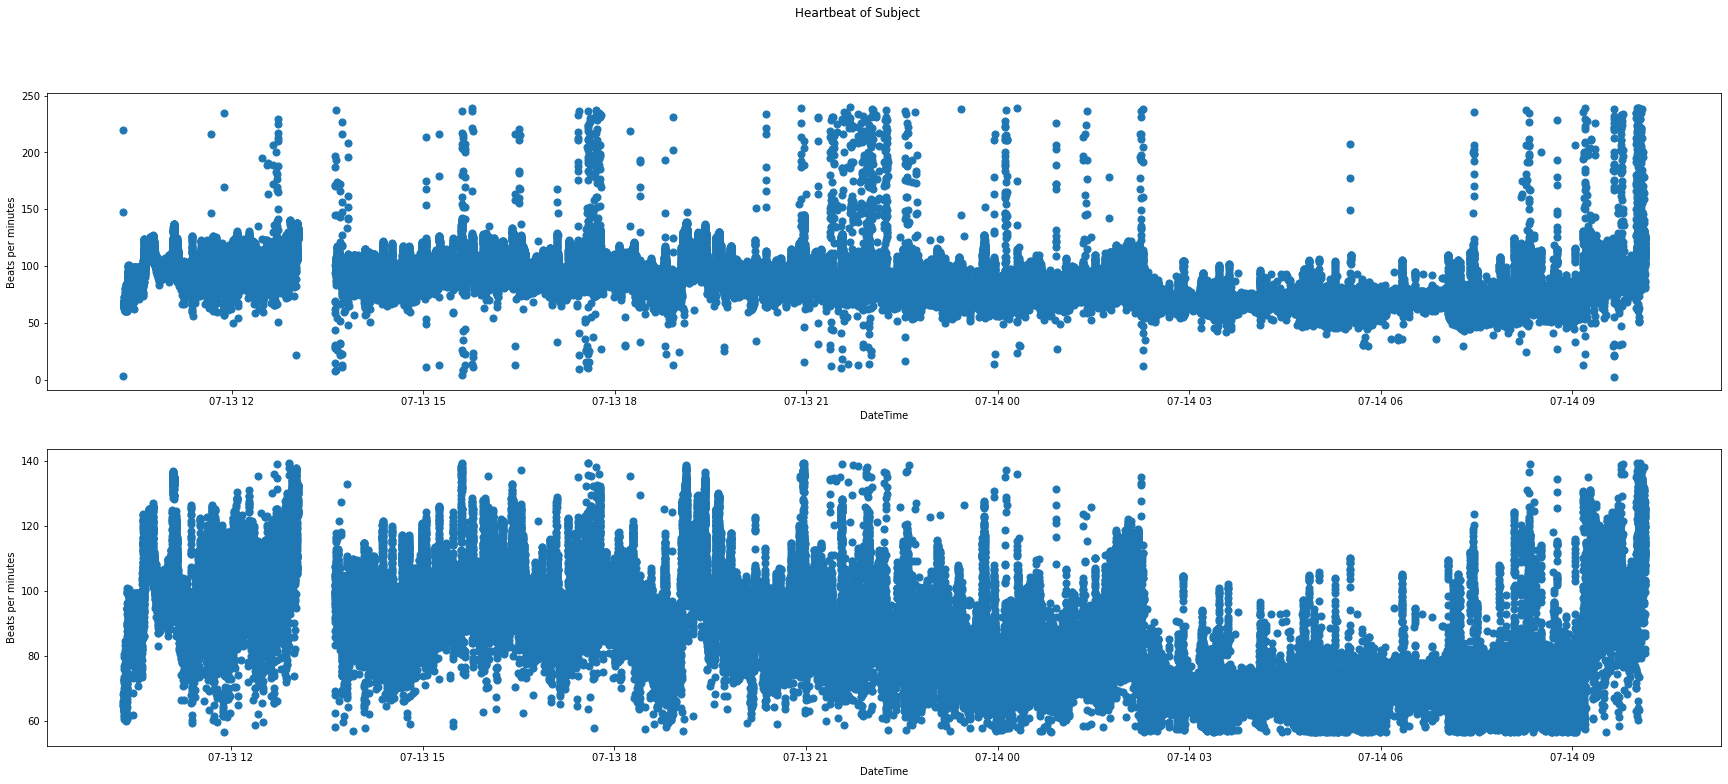

In [7]:
import matplotlib. pyplot as plt

def evaluate_cleaning(subject):
    '''The formula draws a graph to judge the quality of data cleaning
    '''


    times,intervals=read_heartbeat_data(subject)
    hr_raw=hr_from_intervals(intervals)
    times_raw_new,hr_raw_new=clean_data(times,hr_raw,1,99)

    # Set the canvas, create two charts, set the chart size and resolution
    fig,ax=plt.subplots(2,1,figsize=(30,12))

    # Draw the first scatter plot, adding horizontal and vertical coordinates
    ax[0].scatter(times,hr_raw,s=50)
    ax[0].set_ylabel('Beats per minutes')
    ax[0].set_xlabel("DateTime")
    
    # Draw the second scatter plot, adding horizontal and vertical coordinates
    ax[1].scatter(times_raw_new,hr_raw_new,s=50)
    ax[1].set_ylabel('Beats per minutes')
    ax[1].set_xlabel("DateTime")

    # Set the general title
    plt.suptitle("Heartbeat of Subject")

    plt. show()

evaluate_cleaning(3)

By comparing the above two figures, it can be seen that after removing the 1% data that is too high and too low, the object's heartbeat frequency completely falls within the range of 40 to 160, so it is suitable to remove the data outside this range.

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [8]:
def datetime_to_seconds(times):
    return (times - times[0]) / np.timedelta64(1, 's')


def seconds_to_datetime(seconds_elapsed, start_time):
    return seconds_elapsed * np.timedelta64(1, 's') + start_time

# Demonstrating usage
# Create two time points
time0 = '2022-10-01 08:45:00'
time1 = '2022-10-01 08:45:35'

# Create NumPy vector "times" as `datetime64[s]` objects.
times = [np.datetime64(time0), np.datetime64(time1)]

# Returns the interval between time0 and time1 in seconds.
print (datetime_to_seconds(times))

# Returns the datetime plus the time period.
print(seconds_to_datetime(datetime_to_seconds(times), np.datetime64(time0)))


[ 0. 35.]
['2022-10-01T08:45:00' '2022-10-01T08:45:35']


*Use this Markdown cell to explain how the functions `datetime_to_seconds()` and `seconds_to_datetime()` work.*

The first function calculates the interval between two datetimes, counting and displaying them in seconds. The second function is the inverse of the first function.

---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [9]:
def generate_interpolated_hr(times, hr, time_delta):

    times_senconds=datetime_to_seconds(times)

    times_delta=np.arange(times_senconds[0], times_senconds[-1], time_delta) 

    times_interp=[]
    for i in times_delta:
        times_interp.append(seconds_to_datetime(i,times[0])) 
  
    return times_interp

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

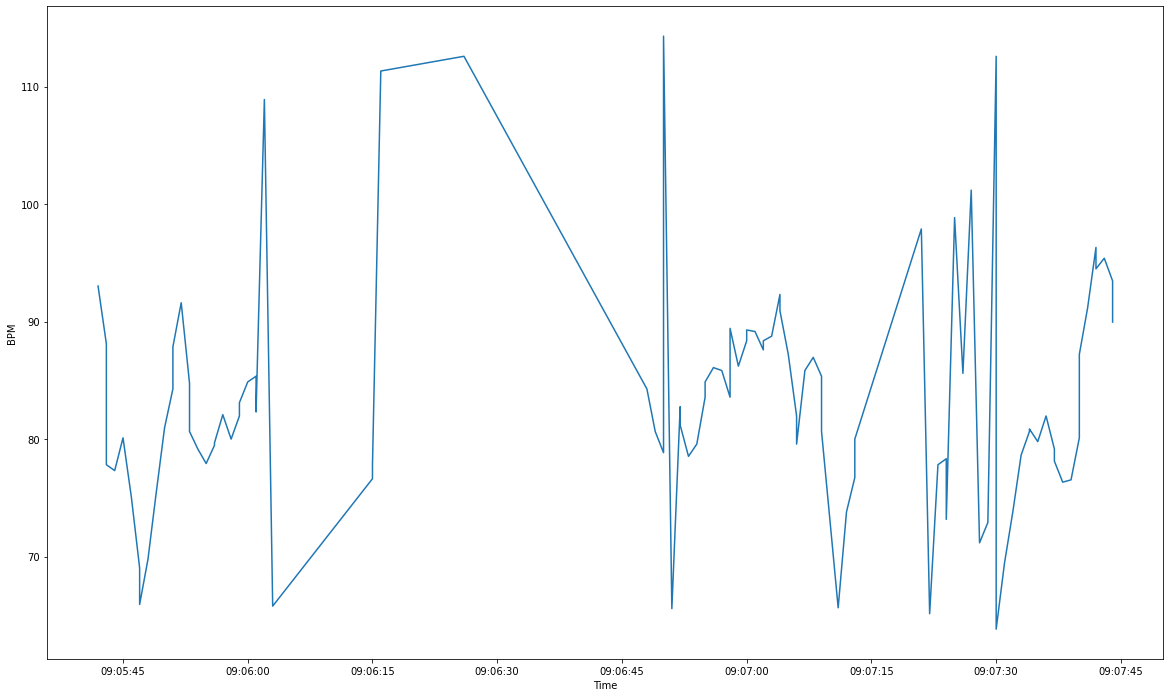

In [11]:
# I'm stuck in 5b, so use the test data
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')

# Set canvas size, horizontal and vertical labels
plt.figure(figsize=(20,12))
plt.xlabel('Time')
plt.ylabel('BPM')

# Print out the first 100 measurements
plt.plot(times[:100], hr[:100])
plt.show()

*Use this Markdown cell for discussing your interpolation results.*

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [ ]:
def rolling_average(times, hr, time_delta, window):
    

---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

In [ ]:
def display_heart_rate(subject):
    

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |